In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
budget_df = pd.read_csv('Phase 1 Project Data/tn.movie_budgets.csv')

In [58]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


TN seems to be a better dataset compared to BOM since it has more data and has a budget column which will allow you to calculate profit. Also there are no missing values 

In [82]:
#Convert columns 3-5 into integers.

budget_df['production_budget'] = budget_df['production_budget'].str.replace(',','').str.replace('$','').astype(int)
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace(',','').str.replace('$','').astype(int)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)

In [83]:
#Create profit column. Split out month from the release date to be used in visualization. 

budget_df['profit'] = budget_df['worldwide_gross'] - budget_df['production_budget']
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])
budget_df['release_month'] = budget_df['release_date'].dt.month.astype(int)

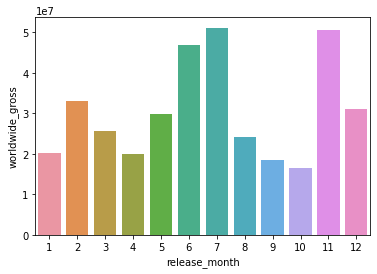

In [90]:
#Create groupedby month subset and create visualization for monthly worldwide sales 

month_grouped_df = budget_df.groupby('release_month', axis = 0).median().sort_values('release_month', ascending = True)

sns.barplot(x = month_grouped_df.index, y = 'worldwide_gross', data = month_grouped_df);

In [ ]:
sn